In [203]:
pwd

'C:\\Users\\HP\\Desktop\\17.2 homework\\ultimate_challenge'

In [204]:
import pandas as pd
import json
from pandas.tseries import converter
converter.register()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  after removing the cwd from sys.path.


In [205]:
with open('ultimate_data_challenge.json') as file:   #read json file
    data=json.load(file)    #loan json file
df=pd.DataFrame(data)   # put data into panda dataframe

In [206]:
df.head() # overview of the dataset

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [207]:
df.info() # check the information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [208]:
# adding new target column
#if trip_in_first_30_days is greater than 0, then it is an active user
#if trip_in_first_30_days equal 0, then it is an inactive user

df['active']=df['trips_in_first_30_days'].apply(lambda x: 1 if x>0 else 0) 
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1


In [209]:
# drop trip_in_first_30_days since it is directed related to target variable

df=df.drop(['trips_in_first_30_days'],axis=1)
df.info() # get general info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                    50000 non-null object
signup_date             50000 non-null object
avg_rating_of_driver    41878 non-null float64
avg_surge               50000 non-null float64
last_trip_date          50000 non-null object
phone                   49604 non-null object
surge_pct               50000 non-null float64
ultimate_black_user     50000 non-null bool
weekday_pct             50000 non-null float64
avg_dist                50000 non-null float64
avg_rating_by_driver    49799 non-null float64
active                  50000 non-null int64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [210]:
from sklearn.preprocessing import LabelEncoder  # import LabelEncoder

le=LabelEncoder() #initiate LabelEncoder
df.city=le.fit_transform(df.city)   # fit data string column into LabelEncoder and transform to integar values
df.ultimate_black_user=le.fit_transform(df.ultimate_black_user)  # fit data string column into LabelEncoder and transform to integar values
df.head() # overview of current dataset

,city,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,1,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0
2,0,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,1
3,1,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1
4,2,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,1


In [211]:
import numpy as np

df.phone=df.phone.fillna('third') # fillin the missing values in phone feature with the word "third".
phone_tr={'iPhone':1,'Android':2, 'third':0} # transfer phone feature into integrar feature
df.phone=[phone_tr[item] for item in df.phone] # replace current data with integar data

df.head() #overview of data

,city,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,1,2014-01-25,4.7,1.10,2014-06-17,1,15.4,1,46.2,3.67,5.0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,2,0.0,0,50.0,8.26,5.0,0
2,0,2014-01-06,4.3,1.00,2014-01-07,1,0.0,0,100.0,0.77,5.0,1
3,1,2014-01-10,4.6,1.14,2014-06-29,1,20.0,1,80.0,2.36,4.9,1
4,2,2014-01-27,4.4,1.19,2014-03-15,2,11.8,0,82.4,3.13,4.9,1


In [212]:
import numpy as np

df.phone=df.phone.replace(0,np.nan) # replace 0 value in phone feature with Nan value


In [213]:
from sklearn.impute import KNNImputer # import KNNImputer

imputer=KNNImputer() #initiate KNNImputer
mv_col=df[['avg_rating_of_driver','phone','avg_rating_by_driver']]  #extract out columns with missing values
df1=imputer.fit_transform(mv_col)  # use KNNImputer to fill in missing values
print(df1)

[[4.7 1.  5. ]
 [5.  2.  5. ]
 [4.3 1.  5. ]
 ...
 [5.  2.  5. ]
 [3.  1.  3.5]
 [4.9 2.  5. ]]


In [214]:
df.avg_rating_of_driver=df1[:,0] # use imputer dataset index 0 column to replace avg_rating_of_driver feature in the dataframe
df.phone=df1[:,1]  # use imputer dataset index 1 column to replace phone feature in the dataframe
df.avg_rating_by_driver=df1[:,2] # use imputer dataset index 2 column to replace avg_rating_by_driver feaature in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                    50000 non-null int32
signup_date             50000 non-null object
avg_rating_of_driver    50000 non-null float64
avg_surge               50000 non-null float64
last_trip_date          50000 non-null object
phone                   50000 non-null float64
surge_pct               50000 non-null float64
ultimate_black_user     50000 non-null int64
weekday_pct             50000 non-null float64
avg_dist                50000 non-null float64
avg_rating_by_driver    50000 non-null float64
active                  50000 non-null int64
dtypes: float64(7), int32(1), int64(2), object(2)
memory usage: 4.4+ MB


In [250]:
print(df.active.value_counts()) # count the total values of two outcomes to make sure if it is an imbalanced dataset
print(df.active.value_counts()[1]/len(df.active))

1    34610
0    15390
Name: active, dtype: int64
0.6922


In [216]:
df.signup_date=pd.to_datetime(df.signup_date,format='%Y-%m-%d',errors='coerce') # convert signup_data feature to datetime type

print(df.signup_date.dt.year.value_counts()) # count the total of each unique year value 
print(df.signup_date.dt.month.value_counts()) # count the total of each unique month value 
print(df.signup_date.dt.day.value_counts()) # count the total of each unique day value 

2014    50000
Name: signup_date, dtype: int64
1    50000
Name: signup_date, dtype: int64
18    2948
25    2885
11    2402
24    2284
17    2149
31    2100
19    2028
10    2021
6     1763
1     1737
26    1708
23    1606
7     1486
4     1485
30    1471
9     1433
16    1431
22    1369
5     1343
12    1334
20    1295
28    1284
8     1275
27    1236
21    1234
3     1213
29    1197
14    1120
15    1110
13    1049
2     1004
Name: signup_date, dtype: int64


In [217]:
# the year and month are the same for all rows, only keeping the day information for the signup_date feature
df.signup_date=df.signup_date.dt.day # replace signup_date feature with day information only
df.head()

,city,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,1,25,4.7,1.10,2014-06-17,1.0,15.4,1,46.2,3.67,5.0,1
1,0,29,5.0,1.00,2014-05-05,2.0,0.0,0,50.0,8.26,5.0,0
2,0,6,4.3,1.00,2014-01-07,1.0,0.0,0,100.0,0.77,5.0,1
3,1,10,4.6,1.14,2014-06-29,1.0,20.0,1,80.0,2.36,4.9,1
4,2,27,4.4,1.19,2014-03-15,2.0,11.8,0,82.4,3.13,4.9,1


In [218]:
df.last_trip_date=pd.to_datetime(df.last_trip_date,format='%Y-%m-%d',errors='coerce') # convert last_trip_date feature to datetime type
print(df.last_trip_date.dt.year.value_counts()) # count the total of each unique year value
print(df.last_trip_date.dt.month.value_counts()) # count the total of each unique month value
print(df.last_trip_date.dt.day.value_counts()) # count the total of each unique day value

2014    50000
Name: last_trip_date, dtype: int64
6    18256
1    10147
5     7585
4     4588
3     4568
2     4308
7      548
Name: last_trip_date, dtype: int64
29    2840
28    2530
30    2377
26    2343
27    2162
1     2097
25    1944
19    1935
22    1912
21    1817
18    1784
20    1765
15    1637
23    1617
16    1593
12    1468
24    1431
17    1412
14    1389
8     1382
11    1341
2     1304
13    1277
7     1268
9     1242
6     1124
5     1069
10    1065
4     1064
31     917
3      894
Name: last_trip_date, dtype: int64


In [219]:
# create two new column to keep the month and day informaiton of last_trip_date feature
df['last_trip_date_month']=df.last_trip_date.dt.month # new column to keep month information 
df['last_trip_date_day']=df.last_trip_date.dt.day # new column to keep day information
df.head()

,city,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,last_trip_date_month,last_trip_date_day
0,1,25,4.7,1.10,2014-06-17,1.0,15.4,1,46.2,3.67,5.0,1,6,17
1,0,29,5.0,1.00,2014-05-05,2.0,0.0,0,50.0,8.26,5.0,0,5,5
2,0,6,4.3,1.00,2014-01-07,1.0,0.0,0,100.0,0.77,5.0,1,1,7
3,1,10,4.6,1.14,2014-06-29,1.0,20.0,1,80.0,2.36,4.9,1,6,29
4,2,27,4.4,1.19,2014-03-15,2.0,11.8,0,82.4,3.13,4.9,1,3,15


In [220]:
df=df.drop('last_trip_date',axis=1) # drop the last_trip_date from dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
city                    50000 non-null int32
signup_date             50000 non-null int64
avg_rating_of_driver    50000 non-null float64
avg_surge               50000 non-null float64
phone                   50000 non-null float64
surge_pct               50000 non-null float64
ultimate_black_user     50000 non-null int64
weekday_pct             50000 non-null float64
avg_dist                50000 non-null float64
avg_rating_by_driver    50000 non-null float64
active                  50000 non-null int64
last_trip_date_month    50000 non-null int64
last_trip_date_day      50000 non-null int64
dtypes: float64(7), int32(1), int64(5)
memory usage: 4.8 MB


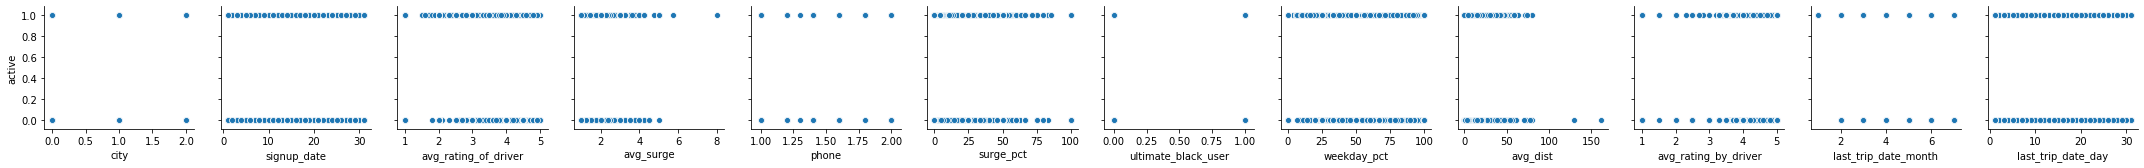

In [221]:
import seaborn as sns #import seaborn as sns
import matplotlib.pyplot as plt # import matplotlib as plt

# do seaborn pairplot as all feautre as x_axis, active as y_axis
sns.pairplot(data=df,y_vars=['active'],
             x_vars=['city','signup_date','avg_rating_of_driver','avg_surge','phone','surge_pct','ultimate_black_user','weekday_pct','avg_dist','avg_rating_by_driver','last_trip_date_month','last_trip_date_day'])
plt.show()

In [222]:
x=df.drop('active',axis=1) # drop active column to get variable x
y=df.active # extract out active column to be variable y

In [223]:
from sklearn.feature_selection import SelectKBest #import SelectKBest

selector=SelectKBest().fit(x,y) # fit variable x, y into SelectKBest
print(selector.scores_) # get scores of each feature

[9.81675122e+01 7.10092434e+01 2.31713548e+01 5.33354143e+00
 1.91442199e-01 6.32254987e+00 7.20341652e+01 2.25289336e+00
 2.47778975e+02 1.91746206e+01 2.52828041e+03 3.84812343e+01]


In [225]:
print(list(zip(x.columns, selector.scores_))) # list out feature names and SelectKBest scores together

[('city', 98.16751223454655), ('signup_date', 71.00924340477374), ('avg_rating_of_driver', 23.1713548067936), ('avg_surge', 5.333541428111518), ('phone', 0.19144219945156968), ('surge_pct', 6.322549869204358), ('ultimate_black_user', 72.03416516197969), ('weekday_pct', 2.252893360529366), ('avg_dist', 247.77897490051527), ('avg_rating_by_driver', 19.174620639021594), ('last_trip_date_month', 2528.2804054329677), ('last_trip_date_day', 38.481234330543124)]


In [226]:
# drop features whose SelectKBest scores are below 30
df_new=df.drop(['phone','weekday_pct','avg_surge','surge_pct','avg_rating_of_driver','avg_rating_by_driver'],axis=1)

In [227]:
 
y_new=df_new.active # get the new variable y_new by extracing out active feature from df_new dataframe
x_new=df_new.drop('active',axis=1) # get the new variable x_new by droping active feature from df_new dataframe

In [239]:
from sklearn.model_selection import train_test_split #import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,random_state=42) # split the dataset into train and test portion


In [229]:
from sklearn.linear_model import LogisticRegression #import logistic regression

LR=LogisticRegression() #initiate logistic regression model
LR.fit(x_train,y_train) # fit data into model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [230]:
LR.predict(x_test) # use model to make prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [231]:
LR.score(x_test,y_test) # get the accuracy score of logistic regression model

0.69224

In [245]:
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x,y,random_state=42) # split the dataset into train and test portion

In [246]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train_1,y_train_1)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [247]:
rf.score(x_test_1,y_test_1)

0.82232